## Import Libraries & Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/home/vipulbansal001/Desktop/EDAs/house-prices-advanced-regression-techniques/train.csv")

## Splitting Training and Validation Dataset

In [3]:
train_data , validation_data = train_test_split(data, test_size=int(len(data)*0.2), train_size=int(len(data)*0.8))

In [4]:
train_data = train_data.drop("Id", axis = 1)

In [5]:
validation_data = validation_data.drop("Id", axis = 1)

## Data Description

In [6]:
train_data.shape, validation_data.shape

((1168, 80), (292, 80))

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 72 to 986
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    964 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          69 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [8]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,964.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1164.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,57.076199,69.707469,10347.756849,6.105308,5.541952,1971.851884,1984.805651,107.244845,445.853596,44.659247,...,91.437500,46.488014,19.684075,3.019692,14.977740,2.973459,32.931507,6.345890,2007.800514,180455.193493
std,42.516091,23.073937,9286.321343,1.398998,1.096049,29.935884,20.682877,185.335371,461.799992,160.963568,...,119.178578,64.402160,57.897114,28.294821,55.638442,41.890850,306.320366,2.662099,1.323611,79364.981295
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,50.000000,70.000000,9491.000000,6.000000,5.000000,1974.000000,1993.500000,0.000000,383.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161000.000000
75%,70.000000,80.000000,11588.000000,7.000000,6.000000,2001.000000,2004.000000,170.000000,719.250000,0.000000,...,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,736.000000,502.000000,552.000000,508.000000,440.000000,738.000000,8300.000000,12.000000,2010.000000,755000.000000


## Divide Numerical & Categorical (Ordinal & Nominal)

In [9]:
numerical_features = train_data.select_dtypes("int64", "float64").keys()
categorical_features = train_data.select_dtypes("object").keys()

In [10]:
numerical_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Finding Correlation between numercial_features and SalePrice

In [12]:
corr_matrix = train_data[numerical_features].corr()

In [13]:
corr_matrix

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.191916,0.039396,-0.061679,0.031798,0.037874,-0.075367,-0.054629,-0.145501,-0.240993,...,-0.054027,-0.016925,-0.010934,-0.055836,-0.013454,0.008754,0.017252,-0.012256,-0.021565,-0.087464
LotArea,-0.191916,1.000000,0.106577,-0.009284,0.002666,0.012747,0.188281,0.128508,0.033115,0.272399,...,0.078037,0.114375,-0.005990,0.027276,0.039050,0.095156,0.042117,-0.010044,-0.014028,0.249282
OverallQual,0.039396,0.106577,1.000000,-0.070782,0.569855,0.565245,0.256849,-0.063179,0.305558,0.543690,...,0.231126,0.361938,-0.100547,0.033176,0.069550,0.045287,-0.056957,0.070281,-0.027054,0.795202
OverallCond,-0.061679,-0.009284,-0.070782,1.000000,-0.367433,0.079758,-0.055145,0.053028,-0.127417,-0.163730,...,0.011592,-0.027106,0.059671,0.025601,0.061575,0.005707,0.014916,0.005008,0.026742,-0.072017
YearBuilt,0.031798,0.002666,0.569855,-0.367433,1.000000,0.608739,0.264134,-0.047968,0.144525,0.397346,...,0.217772,0.241213,-0.384955,0.025888,-0.044091,-0.004777,-0.041524,0.009278,-0.023151,0.531881
YearRemodAdd,0.037874,0.012747,0.565245,0.079758,0.608739,1.000000,0.144040,-0.053586,0.175868,0.302856,...,0.203324,0.271162,-0.203897,0.044262,-0.017165,0.001072,-0.045601,0.018357,0.024124,0.524553
BsmtFinSF1,-0.075367,0.188281,0.256849,-0.055145,0.264134,0.144040,1.000000,-0.056281,-0.476872,0.536315,...,0.196925,0.120911,-0.091137,0.031358,0.090102,0.125418,0.002421,-0.062697,0.017661,0.371589
BsmtFinSF2,-0.054629,0.128508,-0.063179,0.053028,-0.047968,-0.053586,-0.056281,1.000000,-0.215180,0.087667,...,0.062766,0.014818,0.001756,-0.024977,0.067215,0.054240,0.029749,-0.032267,0.042467,-0.016804
BsmtUnfSF,-0.145501,0.033115,0.305558,-0.127417,0.144525,0.175868,-0.476872,-0.215180,1.000000,0.421725,...,0.012352,0.146380,0.016041,0.039593,-0.050117,-0.035483,-0.039534,0.072893,-0.040775,0.236251
TotalBsmtSF,-0.240993,0.272399,0.543690,-0.163730,0.397346,0.302856,0.536315,0.087667,0.421725,1.000000,...,0.237187,0.274421,-0.077209,0.062454,0.067156,0.113293,-0.025955,-0.003925,-0.006954,0.609729


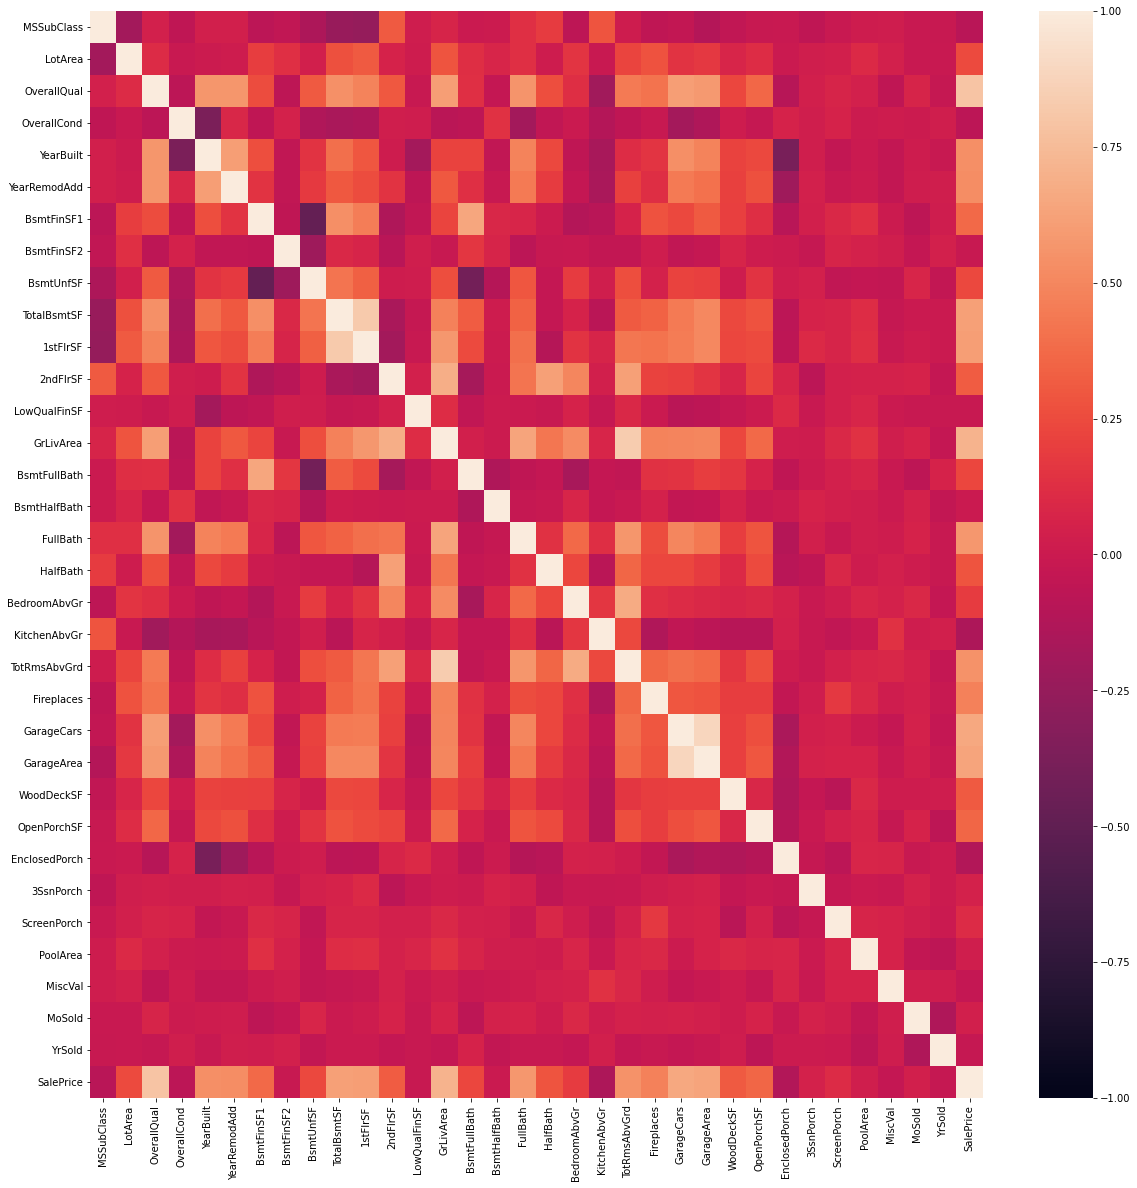

In [14]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0)
plt.show()

## Finding Top Correlated Numerical Features

In [15]:
top_numerical_corr_features = np.abs(corr_matrix).nlargest(10, "SalePrice").index

In [16]:
top_numerical_corr_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [17]:
top_numerical_corr_features = top_numerical_corr_features.drop(labels=["SalePrice"])

In [18]:
top_numerical_corr_features

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

## Plotting Graphs of Top Correlated Features

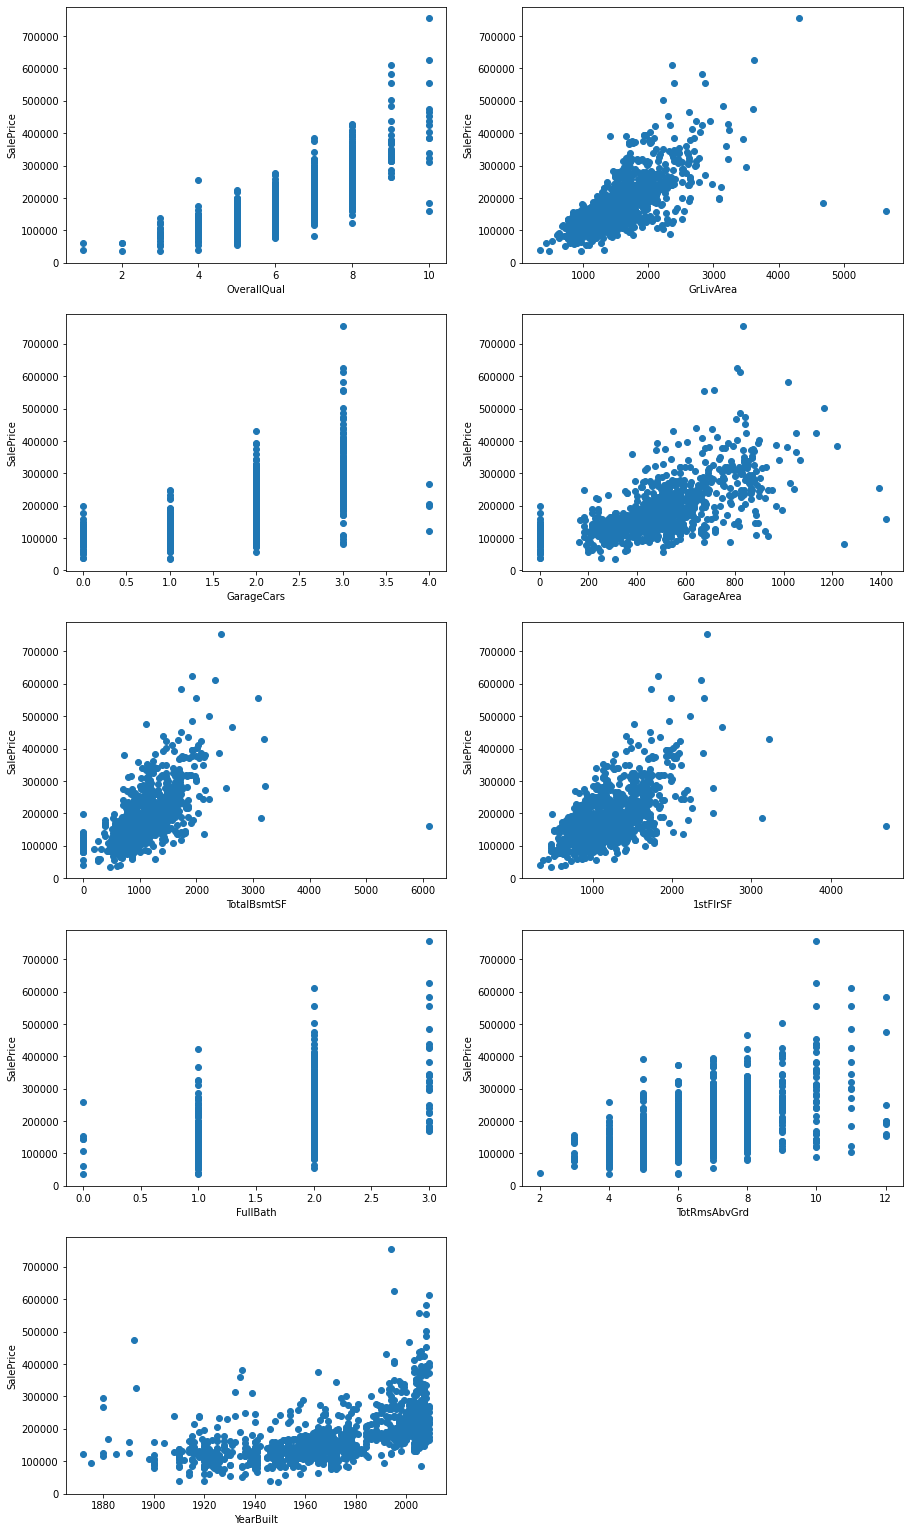

In [19]:
plt.figure(figsize=(15,50))
for i in range(len(top_numerical_corr_features)):
    plt.subplot(int(len(top_numerical_corr_features)),2, i+1)
    plt.scatter(train_data[top_numerical_corr_features[i]], train_data["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(top_numerical_corr_features[i])
plt.show()

## Seperating Ordinal Feaures

In [20]:
ordinal_features = np.array(["OverallQual", "GarageCars", "FullBath", "TotRmsAbvGrd"])
top_numerical_corr_features = top_numerical_corr_features.drop(labels=["OverallQual", "GarageCars", "FullBath", "TotRmsAbvGrd"])

In [21]:
top_numerical_corr_features = top_numerical_corr_features.values

In [22]:
print("Ordinal Features => ",ordinal_features)
print("Numerical Features =>", top_numerical_corr_features)

Ordinal Features =>  ['OverallQual' 'GarageCars' 'FullBath' 'TotRmsAbvGrd']
Numerical Features => ['GrLivArea' 'GarageArea' 'TotalBsmtSF' '1stFlrSF' 'YearBuilt']


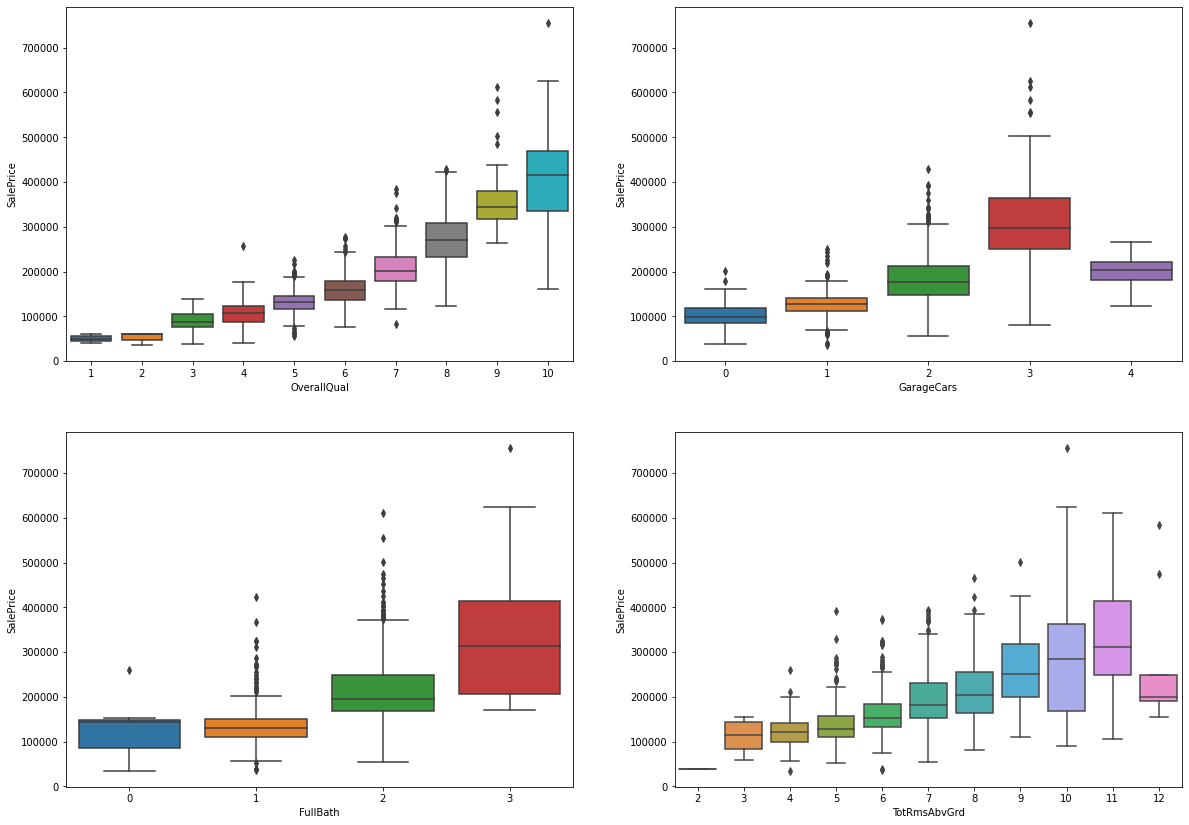

In [23]:
plt.figure(figsize=(20,30))
for i in range(len(ordinal_features)):
    plt.subplot(int(len(ordinal_features)),2, i+1)
    sns.boxplot(data=train_data,x = ordinal_features[i], y="SalePrice")
    plt.ylabel("SalePrice")
    plt.xlabel(ordinal_features[i])
plt.show()

In [24]:
train_data["GarageCarsSq"] = train_data["GarageCars"]**2
train_data["FullBathSq"] = train_data["FullBath"]**2

In [25]:
ordinal_features = np.append(ordinal_features, ["GarageCarsSq", "FullBathSq"])

In [26]:
ordinal_features = np.delete(ordinal_features, np.argwhere(["GarageCars"])+1)
ordinal_features = np.delete(ordinal_features, np.argwhere(["FullBath"])+1)

In [27]:
ordinal_features

array(['OverallQual', 'TotRmsAbvGrd', 'GarageCarsSq', 'FullBathSq'],
      dtype='<U12')

## Graph for Numerical Features

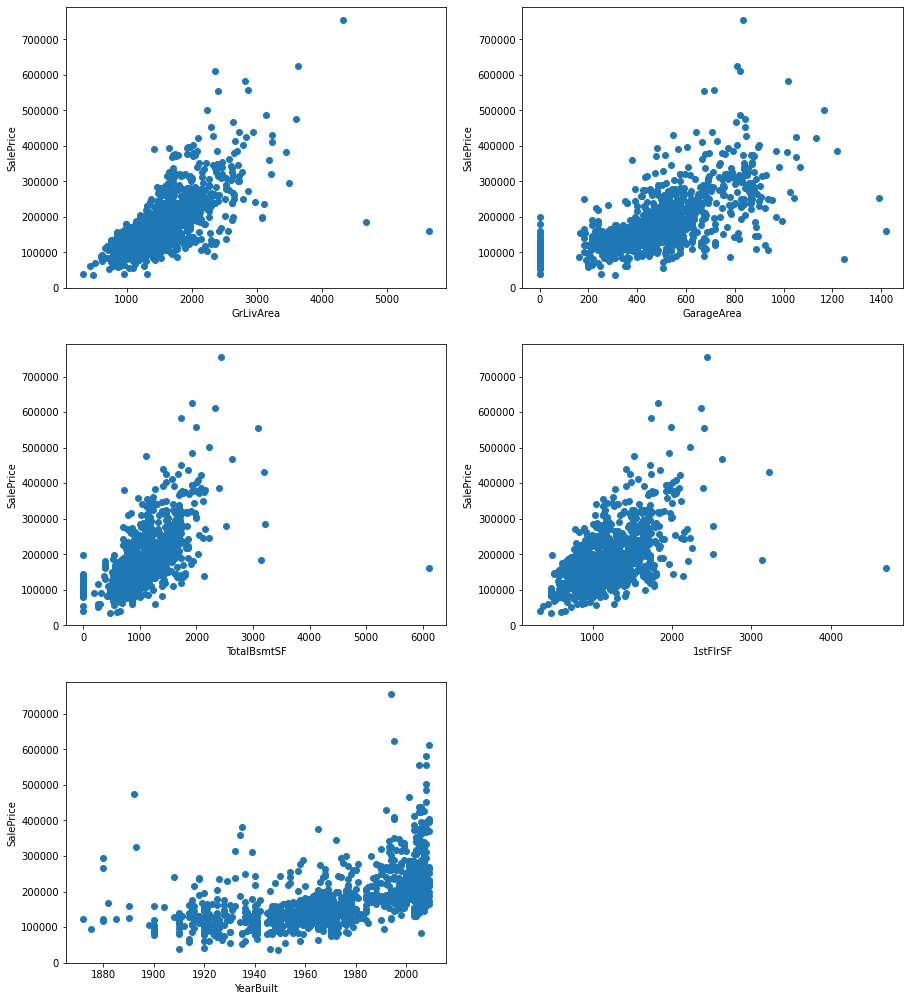

In [28]:
plt.figure(figsize=(15,30))
for i in range(len(top_numerical_corr_features)):
    plt.subplot(int(len(top_numerical_corr_features)),2, i+1)
    plt.scatter(train_data[top_numerical_corr_features[i]], train_data["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(top_numerical_corr_features[i])
plt.show()

## Features Info

In [29]:
train_data[ordinal_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 72 to 986
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1168 non-null   int64
 1   TotRmsAbvGrd  1168 non-null   int64
 2   GarageCarsSq  1168 non-null   int64
 3   FullBathSq    1168 non-null   int64
dtypes: int64(4)
memory usage: 77.9 KB


In [30]:
train_data[top_numerical_corr_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 72 to 986
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GrLivArea    1168 non-null   int64
 1   GarageArea   1168 non-null   int64
 2   TotalBsmtSF  1168 non-null   int64
 3   1stFlrSF     1168 non-null   int64
 4   YearBuilt    1168 non-null   int64
dtypes: int64(5)
memory usage: 87.0 KB


## categorical_features

In [31]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
train_data[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 72 to 986
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Street         1168 non-null   object
 2   Alley          69 non-null     object
 3   LotShape       1168 non-null   object
 4   LandContour    1168 non-null   object
 5   Utilities      1168 non-null   object
 6   LotConfig      1168 non-null   object
 7   LandSlope      1168 non-null   object
 8   Neighborhood   1168 non-null   object
 9   Condition1     1168 non-null   object
 10  Condition2     1168 non-null   object
 11  BldgType       1168 non-null   object
 12  HouseStyle     1168 non-null   object
 13  RoofStyle      1168 non-null   object
 14  RoofMatl       1168 non-null   object
 15  Exterior1st    1168 non-null   object
 16  Exterior2nd    1168 non-null   object
 17  MasVnrType     1164 non-null   object
 18  ExterQual      1168 non-null